## Background Information
#### i. Data and Goals
I am using UFS Prototype 7 reforecast data for Precipitation, Temperature, and 500 hPa Geopotential Height over a specific region over the US, initialized 1st of every month from August to October in 2011-2016 to see if it shows hurricane actibity. 

#### ii. Further Background of Data
UFS P7 is one of the experimental versions of the UFS Global Coupled Model (GCM), which contains S2S reforecast data, and includes variables for atmosphere, land, sea ice, and ocean waves. The retrospective runs were from 2011-2018, and initialized on the 1st and 15th of every month (168 forecasts in total), with a forecast length of 35 days and output frequency of 6 hours. The dataset is in the format of netCDF files, and I imported them from COLA. The COLA data was downloaded by Hedanqiu Bai, and was pre-processed for precipitation ['precip'], temperature ['ts'], and 500hPa geopotential height ['z500'] as daily data. 
* https://vlab.noaa.gov/web/ufs-r2o/gcm-prototypes

#### iii. Background Research
The project I am working as a GRA for is researching the prediction of extreme events in precipitation and temperature over CONUS during boreal summer using UFS P7 with Dr. Stan. It is a continuation of the paper "Prediction of extreme events in precipitation and temperature over CONUS during boreal summer in the UFS coupled model" by Krishnamurthy, V; Stan, C. (10.1007/s00382-021-06120-0.)

For this class, I decided to relate this project to another project I am doing for CLIM 712. My term paper for that class is on the ocean's role in hurricane activity, so I wanted to do something that related the two classes together.

## Assignment 1.A

#### Read Data into Notebook
Since the data I am using is located on COLA, I copied it from COLA to Hopper and have it currently in my scratch directory. My data sets are still a bit large, and exceed the requirements for the dataset size, so I am nervous about moving it to my home directory.  

Once the data is on Hopper, the first step is to read it into the notebook so I can look at it.

In [30]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import datetime

In [3]:
# load in the dataset
file1='/scratch/ldoyle4/subset/precip.nc'
file2='/scratch/ldoyle4/subset/ts.nc'
file3='/scratch/ldoyle4/subset/z500.nc'
files = [file1, file2, file3]
print(files)
ds = xr.open_mfdataset(files, combine='nested')

['/scratch/ldoyle4/subset/precip.nc', '/scratch/ldoyle4/subset/ts.nc', '/scratch/ldoyle4/subset/z500.nc']


In [5]:
#open a dataset, to see what it looks like
ds

<xarray.Dataset>
Dimensions:    (time: 558, latitude: 53, longitude: 89)
Coordinates:
  * time       (time) datetime64[ns] 2011-08-01 2011-08-02 ... 2016-10-31
  * latitude   (latitude) float64 36.0 35.75 35.5 35.25 ... 23.5 23.25 23.0
  * longitude  (longitude) float64 265.0 265.2 265.5 265.8 ... 286.5 286.8 287.0
Data variables:
    precip     (time, latitude, longitude) float64 dask.array<chunksize=(558, 53, 89), meta=np.ndarray>
    ts         (time, latitude, longitude) float64 dask.array<chunksize=(558, 53, 89), meta=np.ndarray>
    z500       (time, latitude, longitude) float64 dask.array<chunksize=(558, 53, 89), meta=np.ndarray>
Attributes:
    history:                   Mon Oct 10 17:38:35 2022: ncatted -a calendar,...
    NCO:                       netCDF Operators version 4.7.5 (Homepage = htt...
    nco_openmp_thread_number:  1

#### Further Pre-Procesing
I am looking at precipitation, temperature, and z500 over a region of the southeast US and surrounding water. I subsetted the data. I did this in the notebook titled Data_Processing.ipynb. 

#### Contour plots of first time step
I made a contour plot for the first time steps from each variable. I constructed the contour plots in grids using the subplot function from matplotlib.

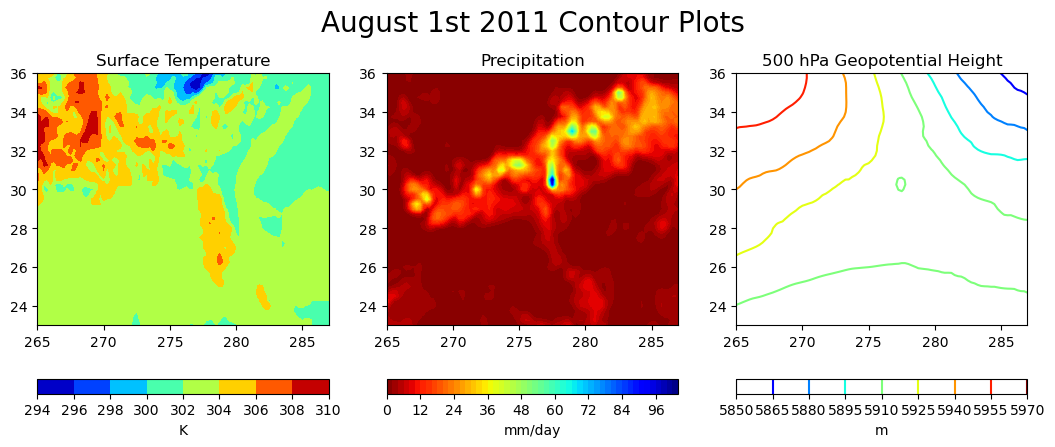

In [17]:
fig = plt.figure(figsize=(11,8))
plt.subplot(1,3,1)
plt.contourf(ds['longitude'], ds['latitude'], ds['ts'][0,:,:], cmap='jet')
plt.colorbar(label='K', orientation='horizontal')
plt.title('Surface Temperature')
plt.subplot(1,3,2)
clevs = np.arange(0, 105, 2)
plt.contourf(ds['longitude'], ds['latitude'], ds['precip'][0,:,:], clevs, cmap='jet_r')
plt.colorbar(label='mm/day', orientation='horizontal')
plt.title('Precipitation')
plt.subplot(1,3,3)
plt.contour(ds['longitude'], ds['latitude'], ds['z500'][0,:,:], cmap='jet')
plt.colorbar(label='m', orientation='horizontal')
plt.title('500 hPa Geopotential Height')
plt.suptitle('August 1st 2011 Contour Plots', fontsize=20)

fig.subplots_adjust(bottom=0.45, top=0.9, left=0.05, right=0.95,
                    wspace=0.2, hspace=0.3)

## Assignment 1.B
#### Plot dataset on a map

I'm going to map July 2011.
I will be starting by mapping the global data, and then from there map the boundaries for CONUS.

The reason I am only doing 2011 is because I have not concatenated my data into 1 file yet. Once I do that, I will come back here and make those edits.

The reason I am mapping the global data first is because it is important to understand the scope of information that this data actually contains, but mostly because I think the distribution across the equator for both temperature and precipitation looks really cool.

In [18]:
#take the average over time for the entire dataset

ds_mean=ds.mean(dim='time')

''

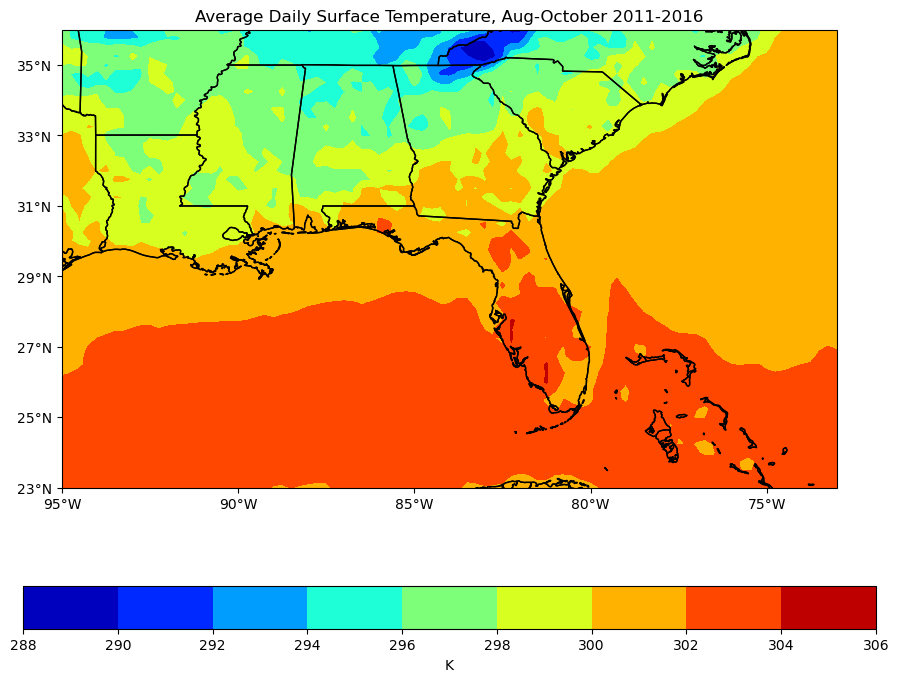

In [23]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contourf(ds['longitude'], ds['latitude'], ds_mean['ts'],
            transform = ccrs.PlateCarree(), cmap='jet')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.title('Average Daily Surface Temperature, Aug-October 2011-2016')

cbar = plt.colorbar(cs, orientation='horizontal',label='K') 

ax.coastlines() 
ax.add_feature(feature.STATES)
;

''

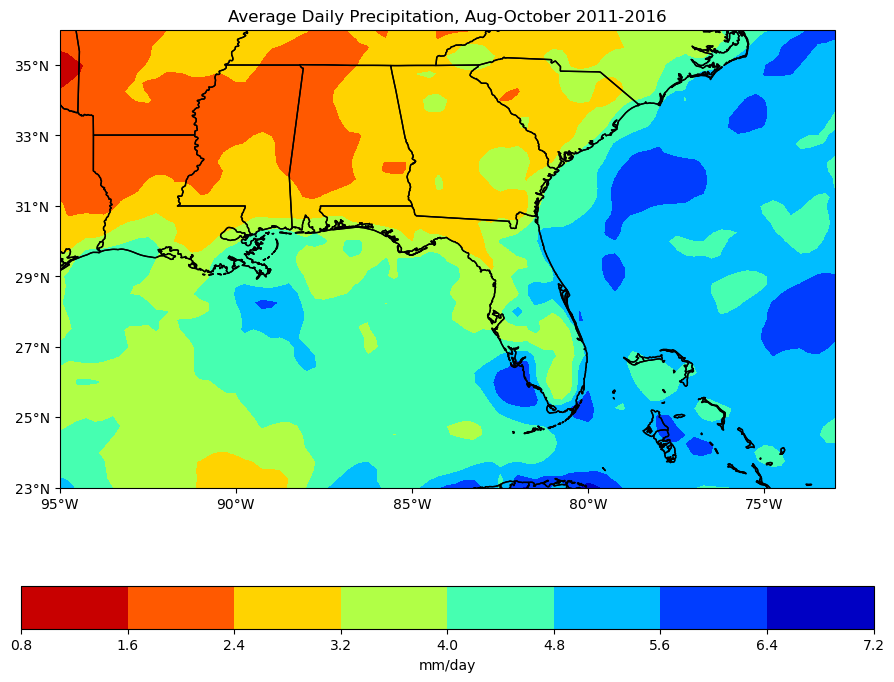

In [28]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contourf(ds['longitude'], ds['latitude'], ds_mean['precip'],
            transform = ccrs.PlateCarree(), cmap='jet_r')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.title('Average Daily Precipitation, Aug-October 2011-2016')

cbar = plt.colorbar(cs, orientation='horizontal',label='mm/day') 

ax.coastlines() 
ax.add_feature(feature.STATES)
;

''

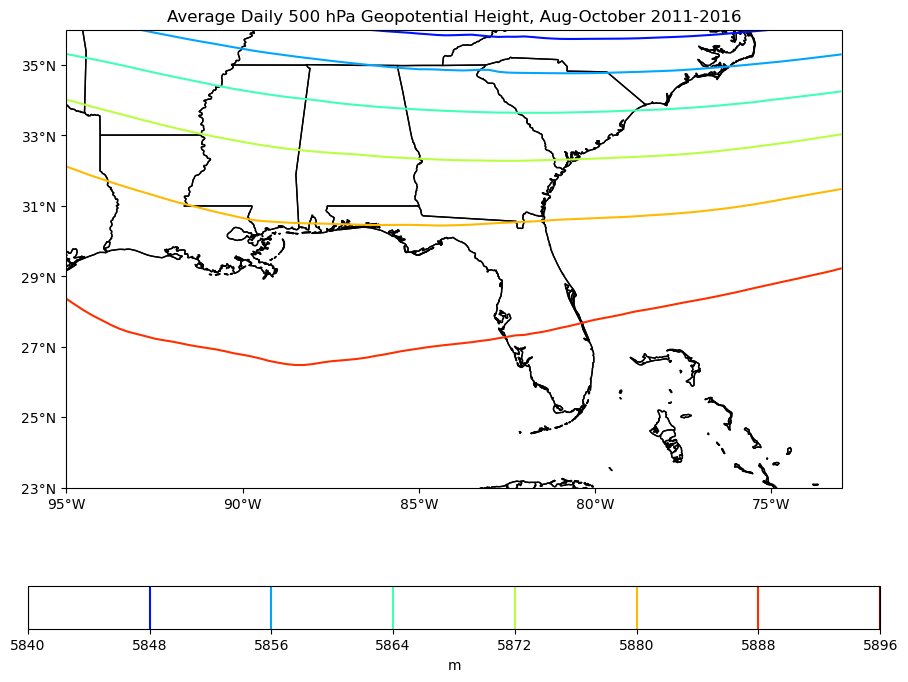

In [29]:
fig = plt.figure(figsize=(11,8.5))

ax=plt.axes(projection=ccrs.PlateCarree())

cs=ax.contour(ds['longitude'], ds['latitude'], ds_mean['z500'],
            transform = ccrs.PlateCarree(), cmap='jet')

ax.set_xticks(np.arange(-95,-72,5), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

ax.set_yticks(np.arange(23,37,2), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

plt.title('Average Daily 500 hPa Geopotential Height, Aug-October 2011-2016')

cbar = plt.colorbar(cs, orientation='horizontal',label='m') 

ax.coastlines() 
ax.add_feature(feature.STATES)
;